# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [16]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Colab Notebooks/data'
data=image_dataset_from_directory(
    data_dir,
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [17]:
data_iterator=data.as_numpy_iterator()

In [18]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

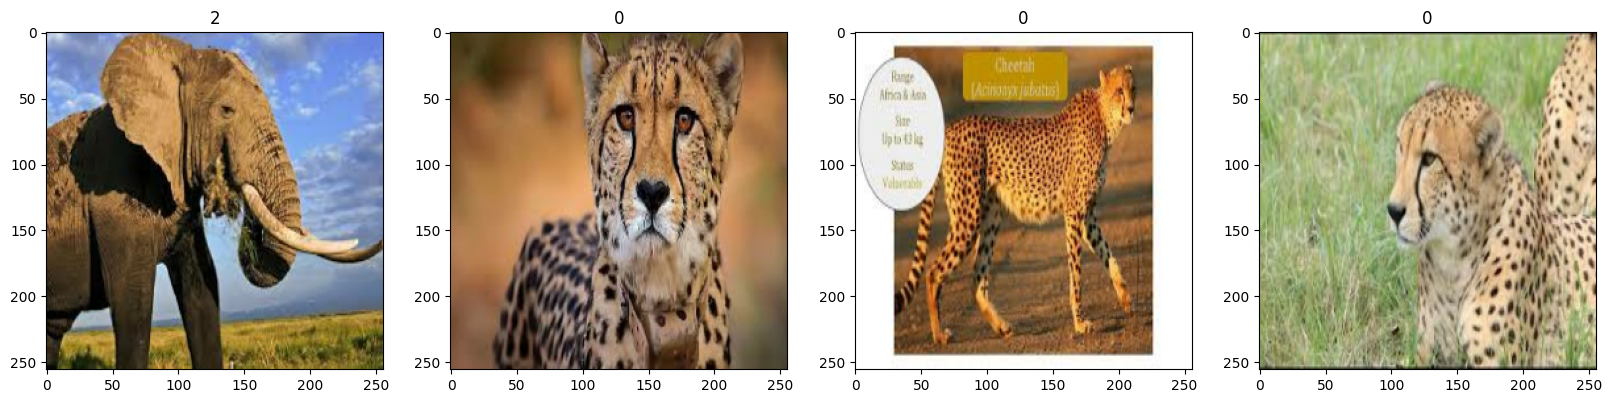

In [21]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [22]:
data=data.map(lambda x, y: (x / 255.0, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [23]:
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2) + 1

train = data.take(train_size)
test = data.skip(train_size).take(test_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: Elephants, Tiger, Crocodile, Cheetah
])


**Q.6** Compile your model

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [26]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
41/41 [==============================] - 27s 587ms/step - loss: 1.6535 - accuracy: 0.3018 - val_loss: 1.3607 - val_accuracy: 0.3304
Epoch 2/10
41/41 [==============================] - 33s 784ms/step - loss: 1.3424 - accuracy: 0.3338 - val_loss: 1.2775 - val_accuracy: 0.4406
Epoch 3/10
41/41 [==============================] - 26s 610ms/step - loss: 1.1530 - accuracy: 0.4848 - val_loss: 1.2052 - val_accuracy: 0.5101
Epoch 4/10
41/41 [==============================] - 26s 601ms/step - loss: 1.0772 - accuracy: 0.5518 - val_loss: 1.0372 - val_accuracy: 0.5797
Epoch 5/10
41/41 [==============================] - 26s 605ms/step - loss: 0.8690 - accuracy: 0.6616 - val_loss: 0.9294 - val_accuracy: 0.6522
Epoch 6/10
41/41 [==============================] - 33s 789ms/step - loss: 0.6691 - accuracy: 0.7462 - val_loss: 0.7439 - val_accuracy: 0.7362
Epoch 7/10
41/41 [==============================] - 26s 602ms/step - loss: 0.4627 - accuracy: 0.8392 - val_loss: 0.6967 - val_accuracy: 0.7681

**Q.8** Test your code with test set

In [27]:
loss,accuracy=model.evaluate(test)

11/11 [==============================] - 13s 76ms/step - loss: 0.5346 - accuracy: 0.8522


In [28]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.852173924446106


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**